In [133]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation


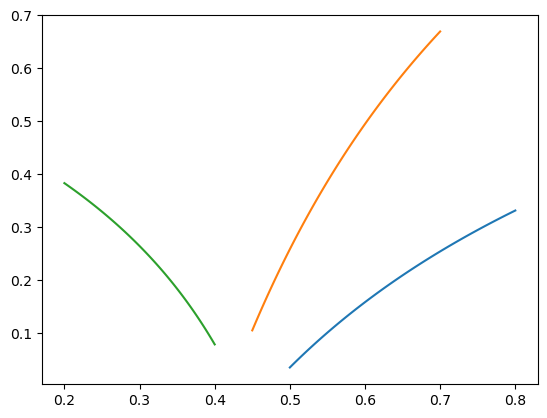

In [134]:
total_before = 70
total_frames = 100
x_red = np.linspace(0.5, 0.8, total_frames)
y_red = (-1/(x_red**0.5) + 1.45)
plt.plot(x_red, y_red)

x_green = np.linspace(0.45, 0.7, total_frames)
y_green = (-1/(x_green**0.8)) + 2.
plt.plot(x_green, y_green)

x_blue = np.linspace(0.4, 0.2, total_frames)
y_blue = -1/(x_blue**0.3)+1.7
plt.plot(-x_blue+0.6, y_blue)

In [135]:
y_blue[0] = y_blue[-1]

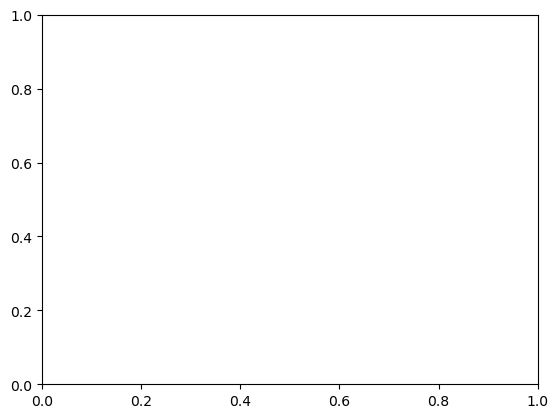

In [138]:
# Create a figure and axis
fig, ax = plt.subplots(1)
rdm_angles_red = np.random.uniform(0, 2*np.pi, 100)
rdm_angles_blue = np.random.uniform(0, 2*np.pi, 100)
rdm_angles_green = np.random.uniform(0, 2*np.pi, 100)

radii_red = np.logspace(0, 0.5, 30)/20 - 0.05
radii_blue = np.logspace(0, 0.5, 30)/15 - 0.06
radii_green = np.logspace(0, 0.5, 30)/25 - 0.04

# Function to initialize the plot
def init():
    ax.clear()
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    return []


# Function to update the plot for each frame
def update(frame):

#     print(frame+1%8)
    ax.clear()
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_xticks([])
    ax.set_yticks([])
    # Your plotting code here
    if frame < total_before:
        ax.scatter(x_red[frame], y_red[frame], c='red')
        ax.scatter(x_blue[frame], y_blue[-frame], c='blue')
        ax.scatter(x_green[frame], y_green[frame], c='green')
    else:
        rdms_x = np.random.normal(0, 0.001, 100)
        rdms_y = np.random.normal(0, 0.001, 100)
        ax.scatter(x_red[frame]+radii_red[frame-total_before]*np.cos(rdm_angles_red) + rdms_x,
                   y_red[frame]+radii_red[frame-total_before]*np.sin(rdm_angles_red) + rdms_y,
                   s=0.2, c='red')
        ax.scatter(x_blue[frame]+radii_blue[frame-total_before]*np.cos(rdm_angles_blue) + rdms_x,
                   y_blue[-frame]+radii_blue[frame-total_before]*np.sin(rdm_angles_blue) + rdms_y,
                   s=0.2, c='blue')
        ax.scatter(x_green[frame]+radii_green[frame-total_before]*np.cos(rdm_angles_green) + rdms_x,
                   y_green[frame]+radii_green[frame-total_before]*np.sin(rdm_angles_green) + rdms_y,
                   s=0.2, c='green')

# Create the animation
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, repeat=False, interval=30)


In [139]:
ani.save('firework.mp4')